In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import chromATAC as ca

In [3]:
parent_dir = '/Users/mossishahi/Code/lupien/IntData'

In [4]:
COORDINATES_DIRECTORY = parent_dir+'/data/V2-TEs/non_olap'
CLUSTERS_DIRECTORY = parent_dir+'/data/V2-TEs/non_olap/cores1000/'

In [5]:
clusters, cls_names = ca.tl.load_beds(CLUSTERS_DIRECTORY)
clusters = ca.al.chrom_counter(clusters)
clusters.columns = cls_names
coors, coo_names = ca.tl.load_beds(COORDINATES_DIRECTORY)
coors = ca.al.chrom_counter(coors)
coors.columns = coo_names

In [6]:
# CREAM cannot extract cores for the TEs that have less than 1000 elements, then we don't have clusters for all TEs
# So we should filter out common TEs between chromosomes dataframe and clusters dataframe
short_chromosomes = coors.loc[:, [l not in clusters.columns for l in coors.columns]]
coors = coors.loc[:, [l in clusters.columns for l in coors.columns]]
coors

,MIRc,MLT1O,AluYj4,Kanga2_a,HERVH-int,L1ME3D,MER31A,Charlie18a,MER21-int,LOR1b,...,L1PA6,L1M4,L1ME1,LTR82A,Charlie22a,L4_C_Mam,ERVL-B4-int,L1M1,LTR88b,THE1D-int
chr,,,,,,,,,,,,,,,,,,,,,
1,10256,476,271,133,453,358,120,241,79,86,...,466,1368,2549,61,106,334,261,693,106.0,127
2,7942,405,262,118,500,367,119,194,50,96,...,456,1632,2720,86,105,417,277,658,151.0,222
3,7232,380,218,109,537,226,88,178,74,65,...,433,1222,2117,75,81,404,258,779,129.0,149
4,5112,224,161,104,501,257,105,103,46,103,...,457,947,1711,90,56,337,346,584,114.0,242
5,5440,296,179,106,358,200,76,151,52,42,...,450,1117,1914,88,51,300,240,543,91.0,190
6,4962,272,177,78,391,296,71,137,58,53,...,418,889,1765,75,67,426,170,520,84.0,131
7,4282,195,201,92,284,257,67,131,47,63,...,313,1224,1719,45,54,282,214,380,80.0,129
8,5214,216,152,60,244,216,72,101,51,72,...,266,980,1393,55,38,216,232,340,70.0,110
9,4734,259,138,52,242,214,59,119,71,44,...,200,1011,1321,44,68,272,167,370,66.0,224


#### Percentile the Numbers

In [7]:
coors = ca.pp.scaler(coors)
clusters = ca.pp.scaler(clusters)

## Differential Analysis of TEs counts of the Clusters VS TEs counts of Chromosomes

### Significant Changes

In [8]:
diff = (clusters - coors).values

<Axes: >

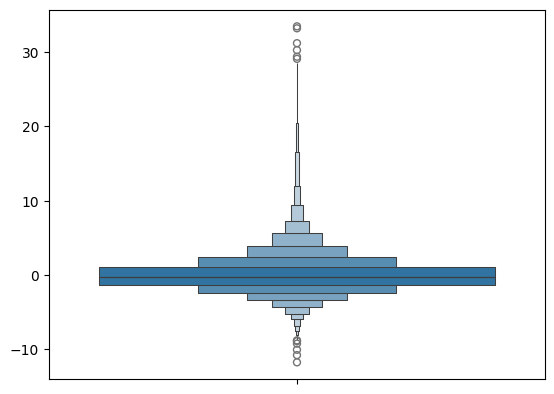

In [10]:
sns.boxenplot(diff.flatten())

### Kolmogorov-Smirnov (KS) test

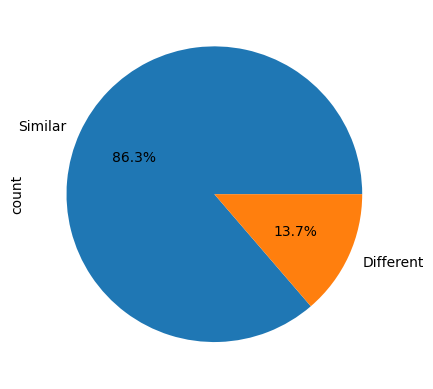

,Column,KS Statistic,P-Value,Distribution Similarity
MIRc,1,0.208333,0.686017,Similar
MLT1O,2,0.250000,0.449037,Similar
AluYj4,3,0.416667,0.029914,Different
Kanga2_a,4,0.458333,0.011965,Different
HERVH-int,5,0.125000,0.994161,Similar
...,...,...,...,...
L4_C_Mam,449,0.208333,0.686017,Similar
ERVL-B4-int,450,0.333333,0.139823,Similar
L1M1,451,0.208333,0.686017,Similar
LTR88b,452,0.250000,0.449037,Similar


In [11]:
ks = ca.al.KS_test(clusters, coors, plot=True)
ks.index = clusters.columns
ks

In [12]:
ks.loc['L1MA1']

Column                           132
KS Statistic                0.458333
P-Value                     0.011965
Distribution Similarity    Different
Name: L1MA1, dtype: object

### Anderson-Darling test

/Users/mossishahi/Code/lupien/IntData/IntData/chromATAC/al/stats.py:66: UserWarning: p-value capped: true value larger than 0.25
  ad_statistic, critical_values, significance_level = anderson_ksamp([df1[:, col_idx], df2[:, col_idx]])
/Users/mossishahi/Code/lupien/IntData/IntData/chromATAC/al/stats.py:66: UserWarning: p-value floored: true value smaller than 0.001
  ad_statistic, critical_values, significance_level = anderson_ksamp([df1[:, col_idx], df2[:, col_idx]])


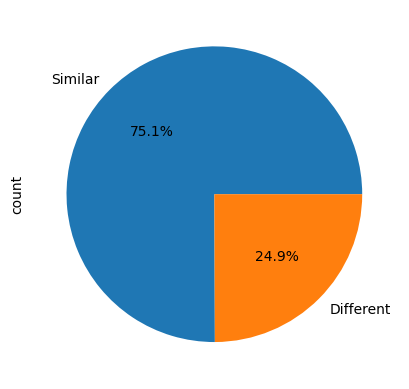

,Column,AD Statistic,Critical Values,Significance Level,Distribution Similarity
MIRc,1,-0.949644,"[0.32500000000000007, 1.226, 1.960999999999999...",0.250000,Similar
MLT1O,2,1.312335,"[0.32500000000000007, 1.226, 1.960999999999999...",0.093522,Similar
AluYj4,3,1.839563,"[0.32500000000000007, 1.226, 1.960999999999999...",0.056649,Similar
Kanga2_a,4,6.056054,"[0.32500000000000007, 1.226, 1.960999999999999...",0.001479,Different
HERVH-int,5,-1.094087,"[0.32500000000000007, 1.226, 1.960999999999999...",0.250000,Similar
...,...,...,...,...,...
L4_C_Mam,449,-0.260169,"[0.32500000000000007, 1.226, 1.960999999999999...",0.250000,Similar
ERVL-B4-int,450,0.176298,"[0.32500000000000007, 1.226, 1.960999999999999...",0.250000,Similar
L1M1,451,-0.616474,"[0.32500000000000007, 1.226, 1.960999999999999...",0.250000,Similar
LTR88b,452,-0.165555,"[0.32500000000000007, 1.226, 1.960999999999999...",0.250000,Similar


In [13]:
ad = ca.al.AnDa_test(clusters, coors, plot=True)
ad.index = clusters.columns
ad

In [14]:
ad.loc['L1MA1']

Column                                                                   132
AD Statistic                                                        5.496832
Critical Values            [0.32500000000000007, 1.226, 1.960999999999999...
Significance Level                                                  0.002311
Distribution Similarity                                            Different
Name: L1MA1, dtype: object

### Chi Squared Test

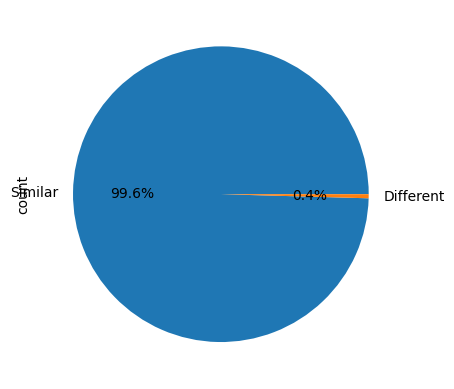

,Column,Chi-Square Statistic,P-Value,Degrees of Freedom,Expected Frequencies,Distribution Similarity
MIRc,1,528.000000,0.241130,506,"[[0.041666666666666664, 0.041666666666666664, ...",Similar
MLT1O,2,240.000000,0.311840,230,"[[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0....",Similar
AluYj4,3,162.666667,0.300598,154,"[[0.16666666666666666, 0.16666666666666666, 0....",Similar
Kanga2_a,4,92.909091,0.339649,88,"[[0.4583333333333333, 0.4583333333333333, 0.45...",Similar
HERVH-int,5,288.000000,0.297428,276,"[[0.041666666666666664, 0.041666666666666664, ...",Similar
...,...,...,...,...,...,...
L4_C_Mam,449,264.000000,0.304454,253,"[[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0....",Similar
ERVL-B4-int,450,160.800000,0.337328,154,"[[0.08333333333333333, 0.08333333333333333, 0....",Similar
L1M1,451,216.000000,0.319632,207,"[[0.08333333333333333, 0.08333333333333333, 0....",Similar
LTR88b,452,134.600000,0.171224,120,"[[0.20833333333333334, 0.20833333333333334, 0....",Similar


In [15]:
chi = ca.al.ChiSquared_test(clusters, coors, plot=True)
chi.index = clusters.columns
chi

## Voting among Statistical tests for finding Oute of Distribution(OOD) Points

In [16]:
diff

array([[ 5.09850885,  1.70273204, -4.56159208, ...,  3.04055289,
        -4.49769785, -4.97453976],
       [-1.38821332, -2.63870712, -5.78301088, ..., -2.56975171,
         2.10592998, -4.69565217],
       [-1.07490631, -0.17449351, -3.09426096, ...,  3.22338831,
         1.15262198, -5.83627105],
       ...,
       [ 1.17537128, -0.7523511 ,  2.22461077, ..., -0.54667788,
        -0.38935756,  3.17743831],
       [ 0.40059842, -0.34756673, -0.2426552 , ...,  3.93644641,
         8.05599333, -9.24402664],
       [-0.20186292, -0.12539185, 19.18930363, ...,  2.03495813,
         0.        , -1.09674892]])

In [19]:
outliers['total']

array([[2., 0., 1., ..., 1., 1., 1.],
       [1., 0., 2., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 3.],
       [0., 0., 0., ..., 1., 2., 4.],
       [0., 0., 5., ..., 4., 0., 2.]])

In [18]:
outliers = ca.al.identify_outliers({'data':diff})

In [20]:
tests = outliers['total']
mask = np.ones_like(tests)
mask[diff<0]= -1
outliers_df = pd.DataFrame((mask*tests).astype(int), columns=clusters.columns)

In [21]:
for k, v in outliers.items():
    print(k)
    print(v.sum())

svm
5433.0
z_score
304.0
iso_forrest
1452.0
grubbs
95.0
interquantile
490.0
total
7774.0


In [22]:
outliers_df # negative numbers: (negative sign shows that the percentage has bee decreased from coordinates to clusters)
            # the number shows that how many statistical test have found it to be significant

,MIRc,MLT1O,AluYj4,Kanga2_a,HERVH-int,L1ME3D,MER31A,Charlie18a,MER21-int,LOR1b,...,L1PA6,L1M4,L1ME1,LTR82A,Charlie22a,L4_C_Mam,ERVL-B4-int,L1M1,LTR88b,THE1D-int
0,2,0,-1,0,0,-1,0,1,1,0,...,0,-1,0,1,1,1,-1,1,-1,-1
1,-1,0,-2,-2,1,1,0,-1,0,1,...,0,0,0,0,0,0,-1,0,1,-1
2,0,0,-1,1,0,0,-1,0,2,-1,...,0,0,-1,0,0,0,0,1,0,-1
3,0,-1,-1,4,-1,-1,1,0,0,4,...,1,0,0,0,-1,0,0,-1,0,0
4,0,1,0,3,1,-1,-1,2,0,0,...,0,-1,-1,2,0,0,0,-1,0,-3
5,0,-1,0,0,0,2,0,0,1,0,...,1,0,0,0,0,3,0,0,-1,-2
6,0,0,2,-1,0,0,-2,-1,1,-1,...,-1,1,0,0,-1,0,-1,0,-1,-2
7,0,0,0,-1,0,1,0,0,-1,-1,...,-1,0,0,-2,-1,0,-1,0,0,0
8,0,1,0,0,0,0,1,-1,2,0,...,0,1,0,1,1,1,-1,0,1,5
9,-1,1,0,2,-1,1,1,-1,1,-1,...,0,0,-1,0,2,0,-1,0,0,0


### Assignment of TEs to Chromosomes

In [23]:
# Define the size of majority portion required to identify a change as a significant change
MAJORITY_NUMBER = 3
# np.abs shows that we here consider the negative changes as well
chr_assignments = {}
for te in outliers_df.columns:
    chr_assignments[te] = np.where(np.abs(outliers_df.loc[:,te])>=MAJORITY_NUMBER)[0]

In [24]:
chrs = {i:[] for i in range(0, 24)}
len_chrs = []

In [25]:
for k, v in chr_assignments.items():
    len_chrs.append(len(v))    
    for chr in v:
        chrs[chr].append(k)

<Axes: ylabel='count'>

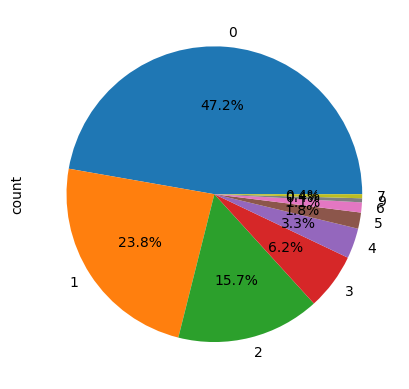

In [26]:
pd.Series(len_chrs).value_counts().plot(kind='pie', autopct='%1.1f%%')

In [27]:
clusters.columns

Index(['MIRc', 'MLT1O', 'AluYj4', 'Kanga2_a', 'HERVH-int', 'L1ME3D', 'MER31A',
       'Charlie18a', 'MER21-int', 'LOR1b',
       ...
       'L1PA6', 'L1M4', 'L1ME1', 'LTR82A', 'Charlie22a', 'L4_C_Mam',
       'ERVL-B4-int', 'L1M1', 'LTR88b', 'THE1D-int'],
      dtype='object', length=453)

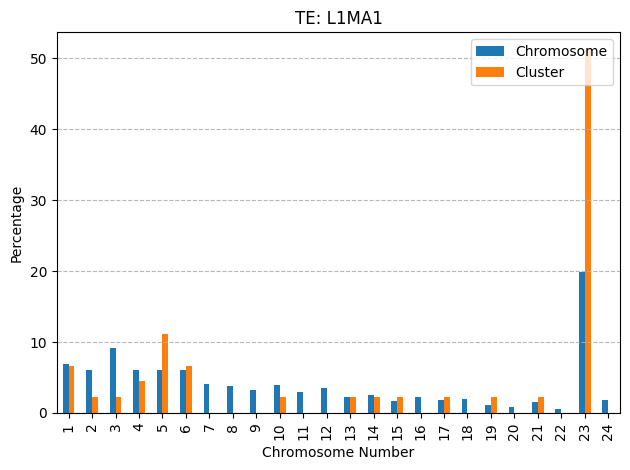

In [10]:
te = 'L1MA1'
df = pd.concat([coors.loc[:, te], clusters.loc[:, te]], axis=1)
df.columns = ['Chromosome', 'Cluster']
df = df.div(df.sum()) * 100
ax = df.plot(kind='bar', rot=90)  # Rotate x-axis labels for readability

plt.title(f"TE: {te}")  # Add a title
plt.xlabel("Chromosome Number")  # Label for x-axis
plt.ylabel("Percentage")  # Label for y-axis

# Customize legend
plt.legend(loc='upper right')

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()  # Ensure proper spacing

plt.show()  # Display the plot

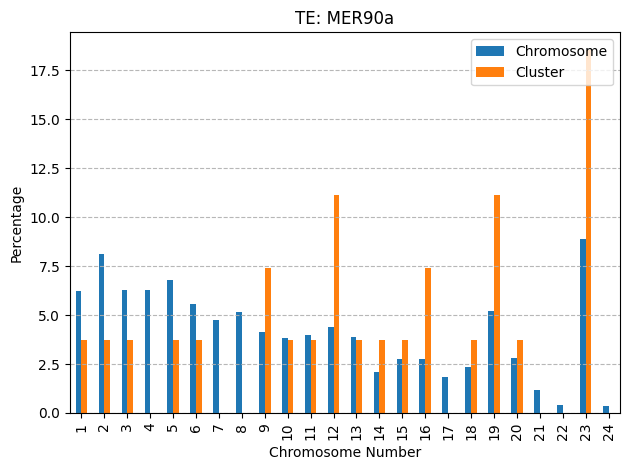

In [9]:
te = 'MER90a'
df = pd.concat([coors.loc[:, te], clusters.loc[:, te]], axis=1)
df.columns = ['Chromosome', 'Cluster']
df = df.div(df.sum()) * 100
ax = df.plot(kind='bar', rot=90)  # Rotate x-axis labels for readability

plt.title(f"TE: {te}")  # Add a title
plt.xlabel("Chromosome Number")  # Label for x-axis
plt.ylabel("Percentage")  # Label for y-axis

# Customize legend
plt.legend(loc='upper right')

# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()  # Ensure proper spacing

plt.show()  # Display the plot

[ 1  3  6  7  9 10 11 14 17 18 19 21 23 24]
[ 6 11 14 21 24]
[ 6 24]
[]
[ 6 14 24]
[ 6 14 24]


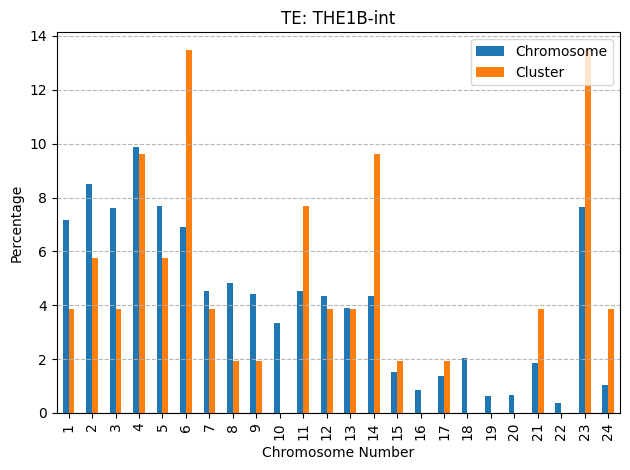

[ 1  2  3  4  5  7  8 10 11 12 13 14 15 16 18 19 20 21 22 24]
[ 7 10 11 13 15]
[13 24]
[]
[11 13 24]
[11 13 24]


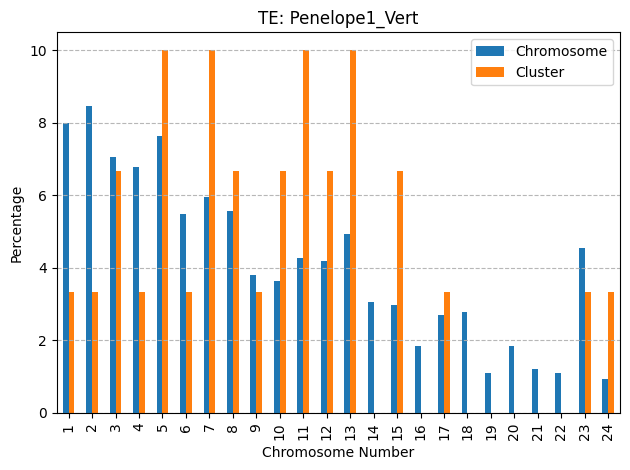

[ 2 14 15 16 22 23]
[]
[]
[]
[]
[]


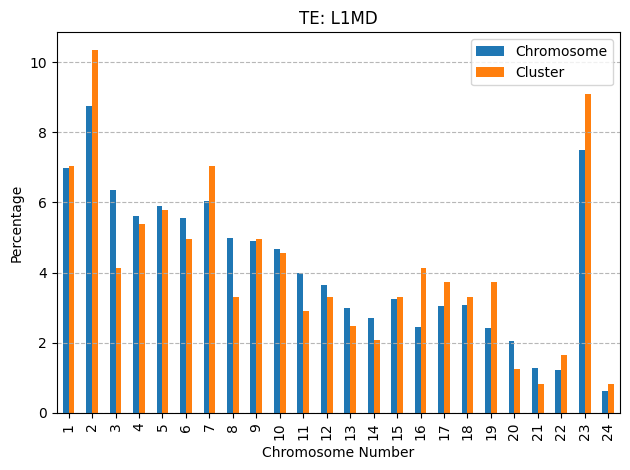

[ 3  5 13]
[]
[]
[]
[]
[]


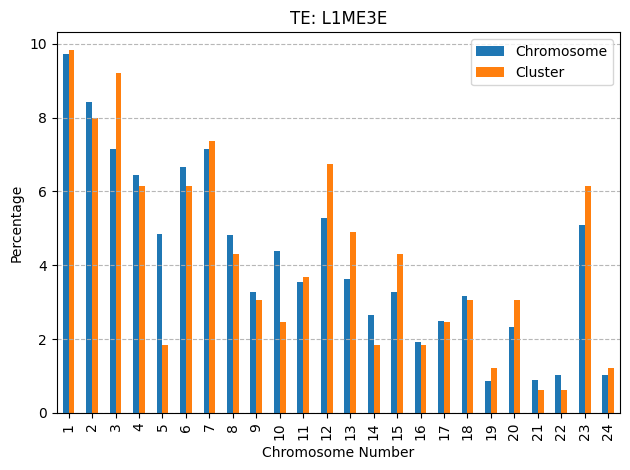

[ 3  4  6  9 23]
[]
[]
[]
[]
[]


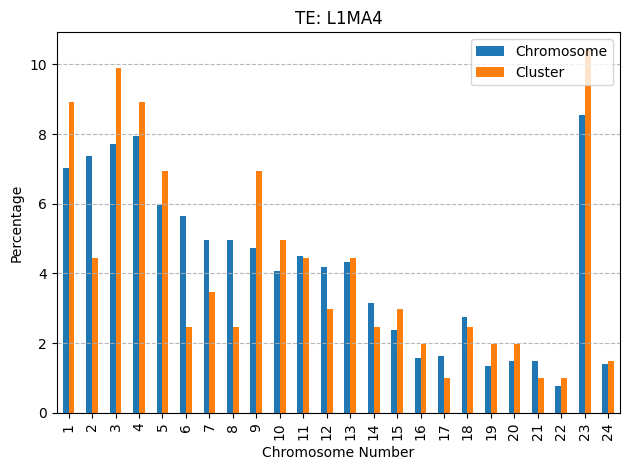

[ 1  4  5  7  9 10 14 17 19]
[ 7 19]
[]
[]
[]
[]


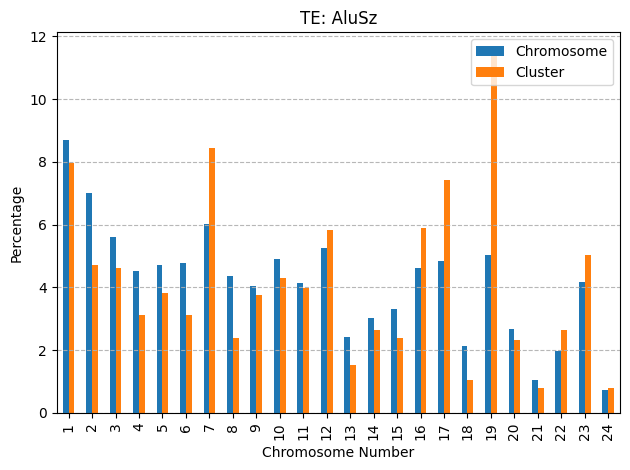

[ 3  6  7 10 13 14 16 17 20]
[20]
[]
[]
[20]
[20]


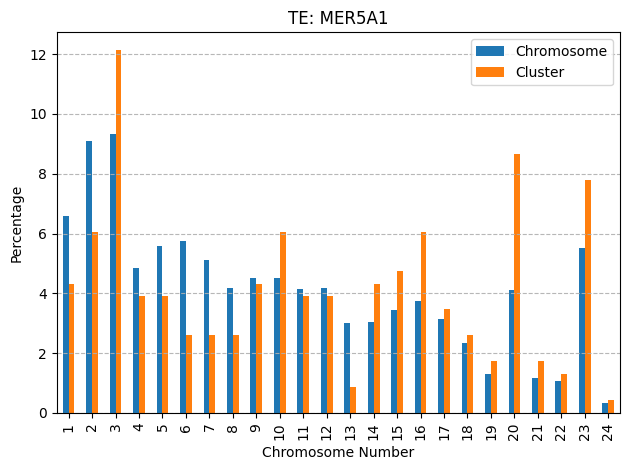

[ 1  3  4  5  6  7  8  9 12 13 14 15 20 21 22]
[3 6]
[]
[]
[]
[]


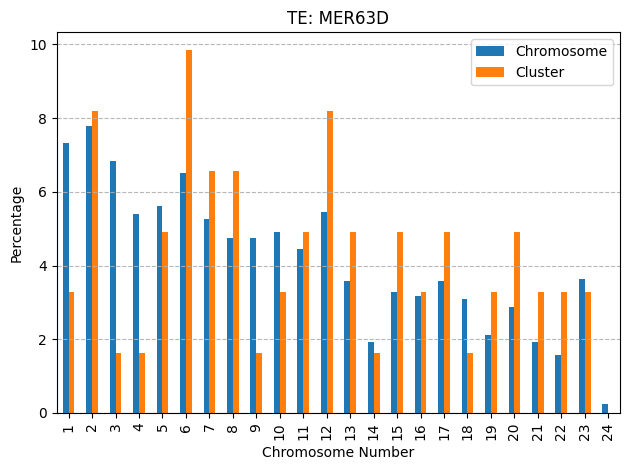

[ 2  4  5  7  8  9 11 12 14 16 17 18 19 21 23 24]
[ 4  7  8 12 19 23]
[]
[]
[12 23]
[12 23]


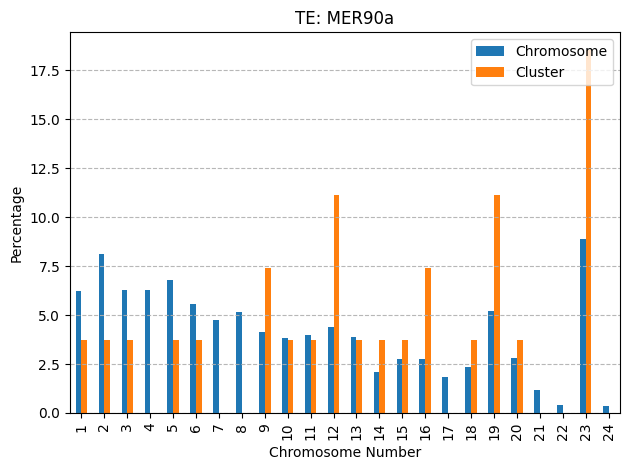

[ 3  5  9 12 13 14 15 17 18 19 20 21 22 24]
[ 3 12 21 24]
[24]
[]
[24]
[24]


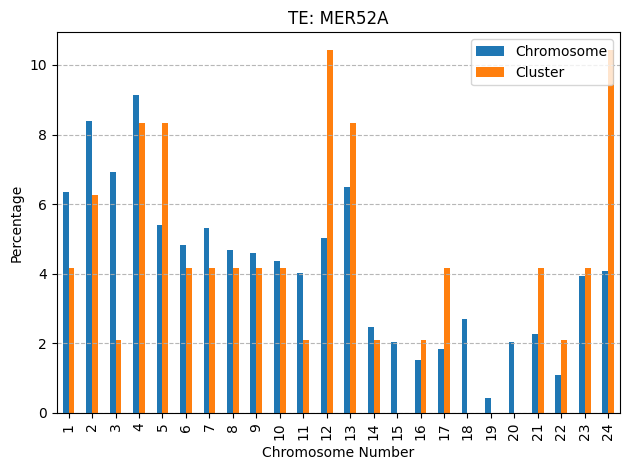

[ 2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23 24]
[ 4  5  6  7  8 10 12 15 16 17 19 20 24]
[15 17 24]
[15 17]
[ 8 10 15 17 24]
[ 8 10 15 17 24]


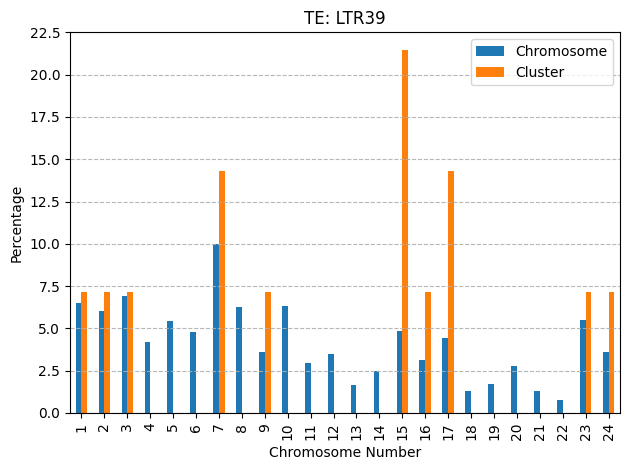

[ 2  5  6 15 17]
[]
[]
[]
[]
[]


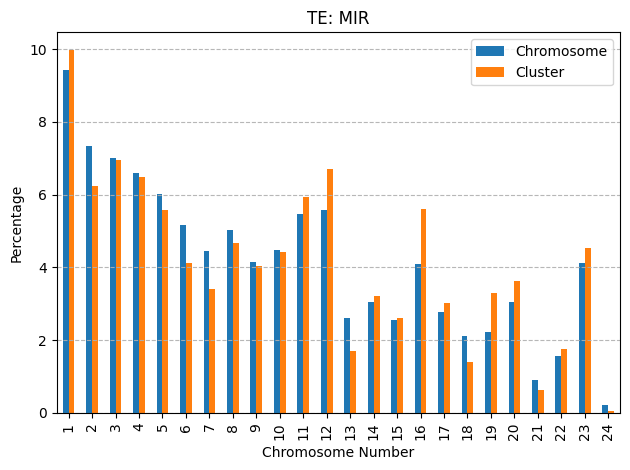

[ 2  6  8  9 10 18 19 20 21 22 23 24]
[ 6 18]
[]
[]
[]
[]


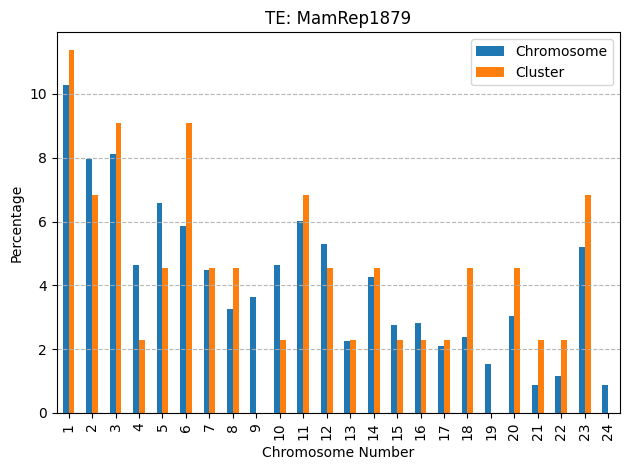

[ 3 10 11 19 23]
[]
[]
[]
[]
[]


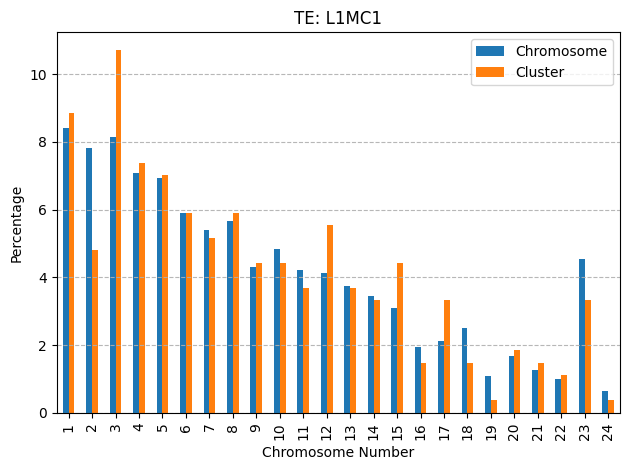

[ 2  6 10 11 13 19 23 24]
[11 23]
[23]
[]
[23]
[23]


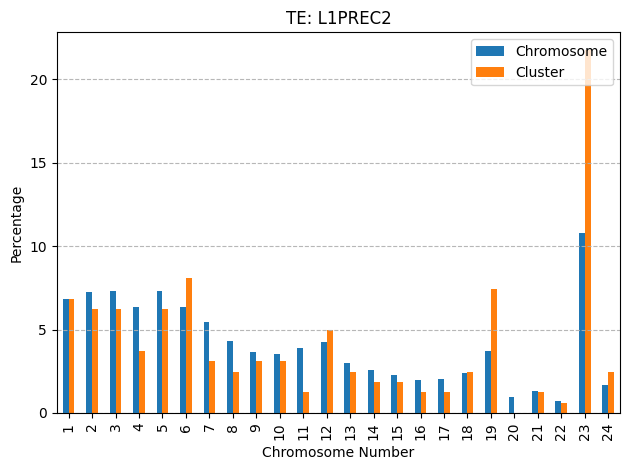

[ 4  6 16 17 19 22 24]
[]
[]
[]
[]
[]


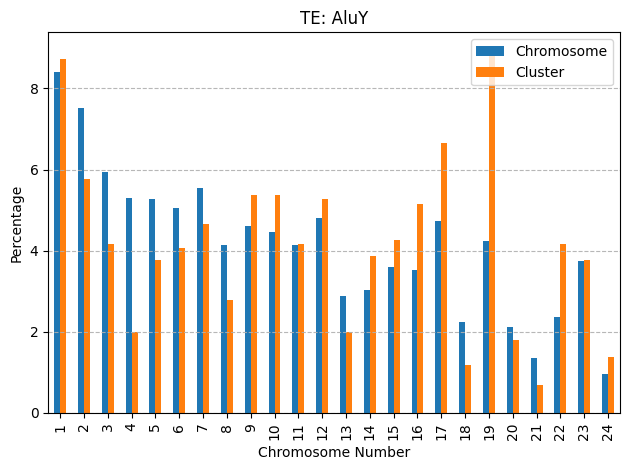

[ 2  8  9 13 20 21 23 24]
[]
[]
[]
[]
[]


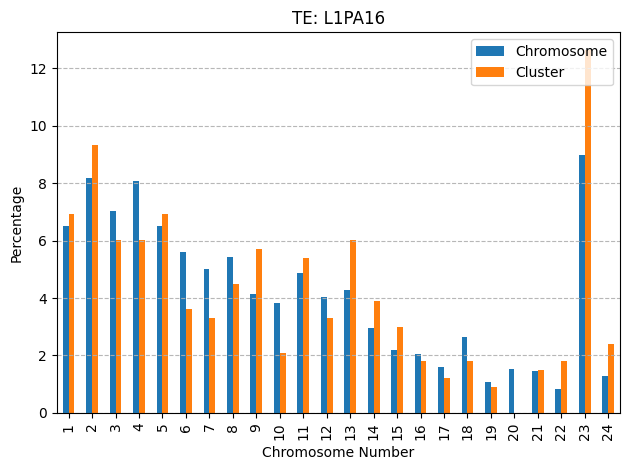

[ 2  3  6  7  9 14 17 18 19 21 23 24]
[ 2 14 21]
[]
[]
[2]
[2]


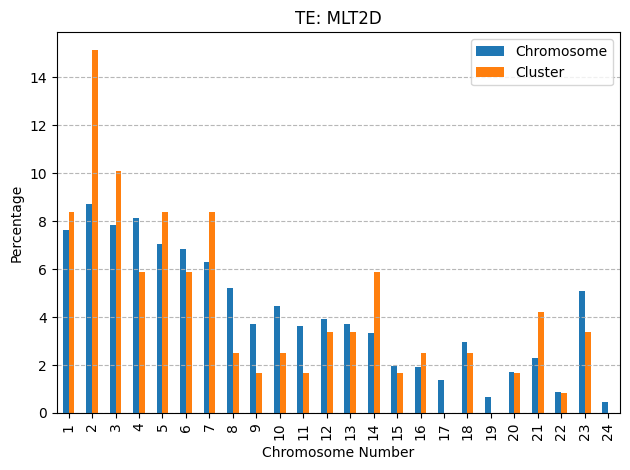

[ 2  6  9 10 11 15 17 19]
[]
[]
[]
[]
[]


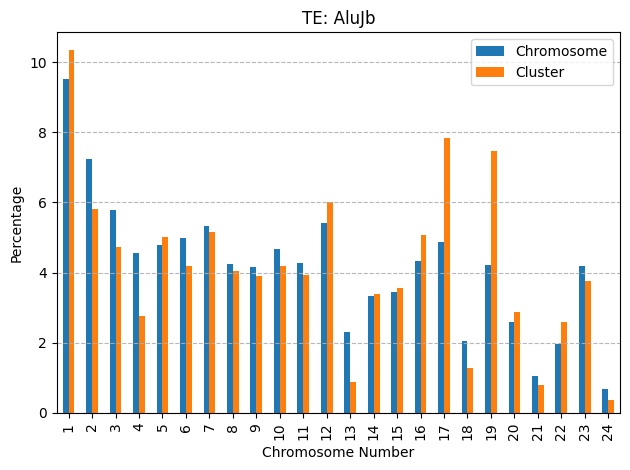

[ 3  6  8  9 10 11 12 13 15 17 21 23 24]
[ 3 11 17 24]
[24]
[24]
[24]
[24]


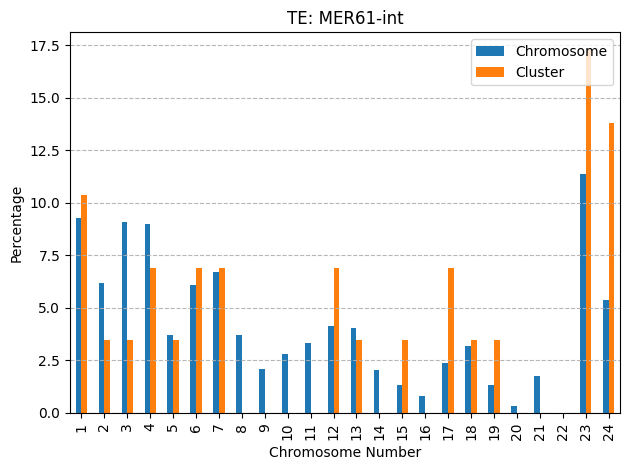

[ 1  6  9 10 11 12 13 15 16 18 20 22]
[10 11 12 15]
[10]
[10]
[10]
[10]


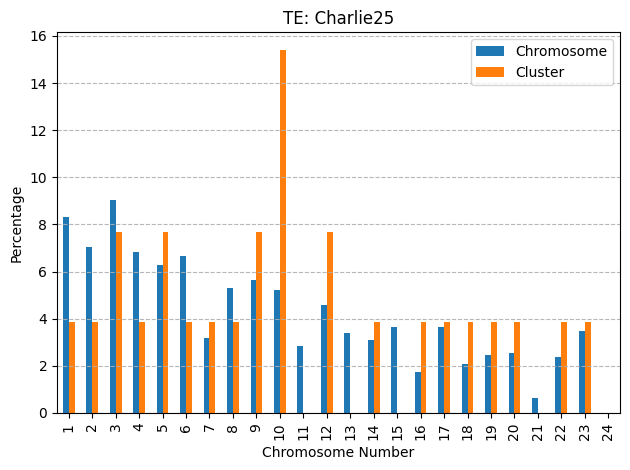

[ 1  2  4  8 14 15 16 17]
[ 1 17]
[ 1 17]
[ 1 17]
[ 1 17]
[ 1 17]


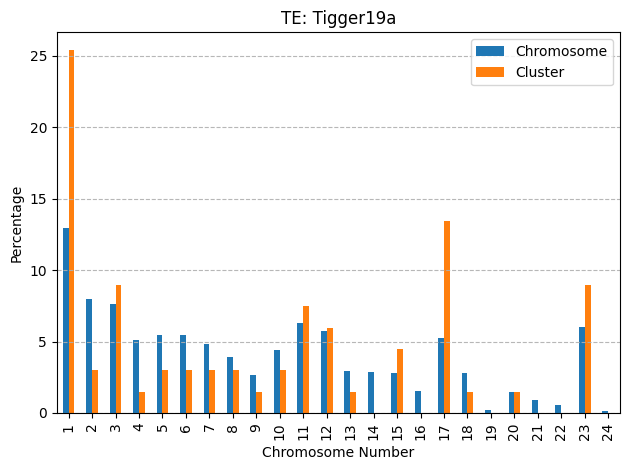

[ 2  3  4  5  8  9 11 13 16 20 21 22 23 24]
[]
[]
[]
[]
[]


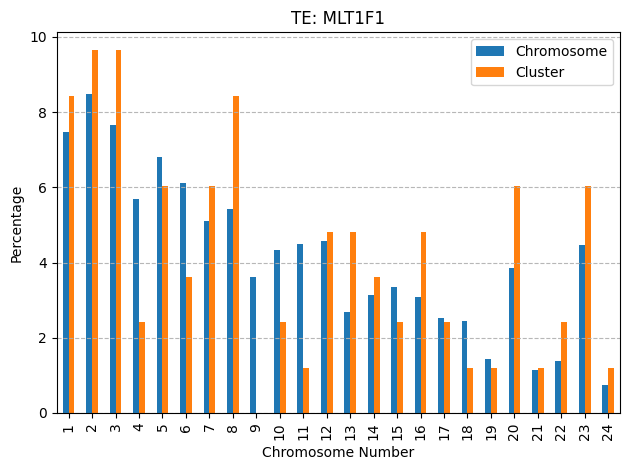

[ 1  4  6  7  8  9 10 11 12 14 15 16 17 19 20 22 24]
[10 11 12 14 16 17 19 20 22]
[16 20]
[16 20]
[12 16 20]
[12 16 20]


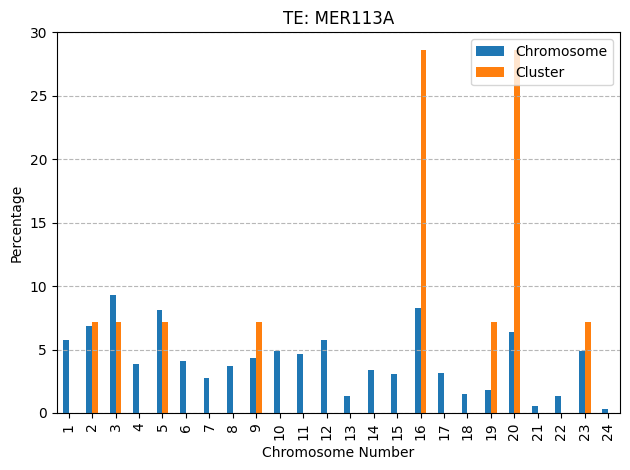

[ 1  3  4  5  6  8  9 10 11 13 15 16 17 18 19 20 21 22 23 24]
[ 5  6  8 10 11 13 17 21 22 23]
[22 24]
[]
[ 5 22 23]
[ 5 22 23]


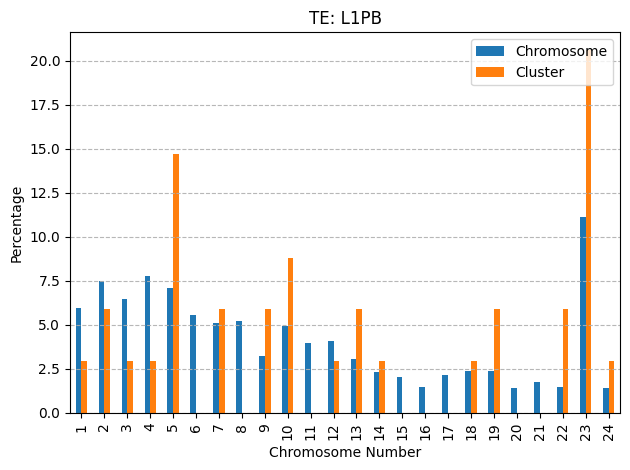

[ 1  2  4  6  7  8  9 10 12 13 15 16 17 18 19 20 21 22 23 24]
[ 1  7  8 10 13 15 17 18 19 22 24]
[8]
[]
[ 8 13]
[ 8 13]


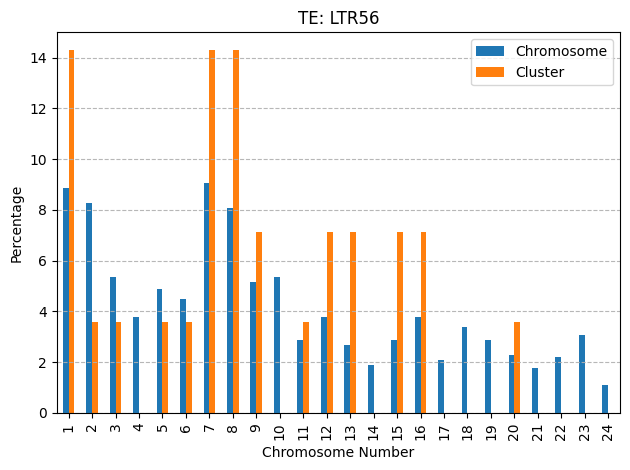

[ 1  2  3  5  6  7  9 15 17 18 20 22]
[15]
[]
[]
[]
[]


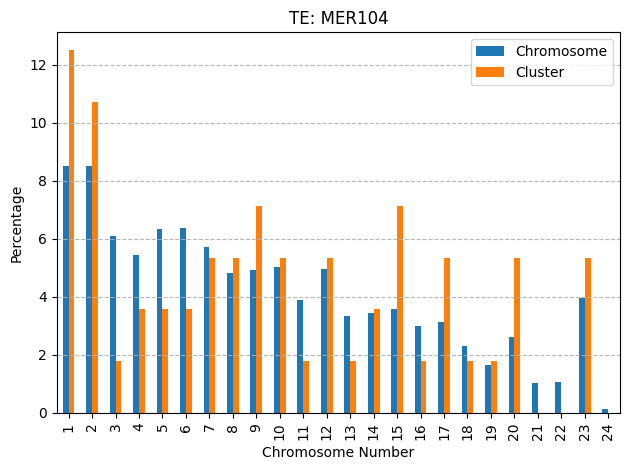

[15 17 23]
[]
[]
[]
[]
[]


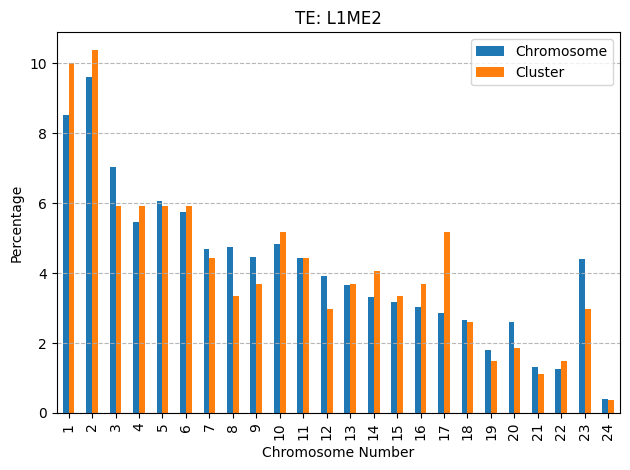

[ 1  6  9 12 15 20 22]
[ 6 12]
[]
[]
[6]
[6]



KeyboardInterrupt



In [36]:
for i, te in enumerate(clusters.columns):
    print(np.where(outliers['svm'][:, i].flatten()==1)[0]+1)
    print(np.where(outliers['iso_forrest'][:, i].flatten()==1)[0]+1)
    print(np.where(outliers['z_score'][:, i].flatten()==1)[0]+1)
    print(np.where(outliers['grubbs'][:, i].flatten()==1)[0]+1)
    print(np.where(outliers['interquantile'][:, i].flatten()==1)[0]+1)
    print(chr_assignments.get(te)+1)
    df = pd.concat([coors.loc[:, te], clusters.loc[:, te]], axis=1)
    df.columns = ['Chromosome', 'Cluster']
    df = df.div(df.sum()) * 100
    ax = df.plot(kind='bar', rot=90)  # Rotate x-axis labels for readability

    plt.title(f"TE: {te}")  # Add a title
    plt.xlabel("Chromosome Number")  # Label for x-axis
    plt.ylabel("Percentage")  # Label for y-axis

    # Customize legend
    plt.legend(loc='upper right')
    
    # Customize grid
    plt.grid(axis='y', linestyle='--', alpha=0.9)

    plt.tight_layout()  # Ensure proper spacing

    plt.show()  # Display the plot

In [37]:
len_tes = {i:len(chrs[i]) for i in range(0, 24)}

In [42]:
chrs[7]

['LTR39',
 'LTR56',
 'MamGypLTR3a',
 'MLT1H1',
 'MER113',
 'Helitron3Na_Mam',
 'MER44B',
 'Cheshire',
 'MER65-int',
 'MER50',
 'LTR40a',
 'Charlie24',
 'MER67D']

<AxesSubplot: xlabel='chr'>

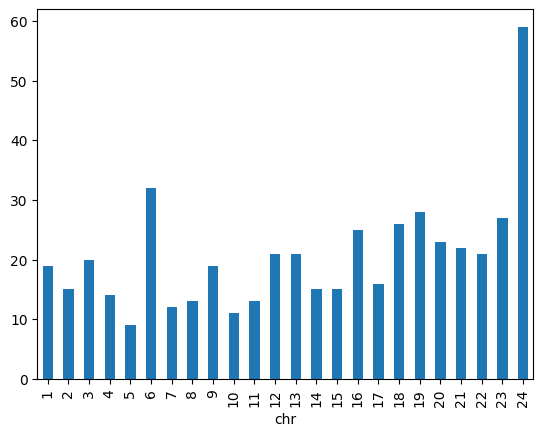

In [38]:
pd.DataFrame({'TE_count':len_tes.values()}, index=coors.index)['TE_count'].plot(kind='bar')

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Melt the dataframe
data_melted = diff.melt(id_vars="Superfamily", var_name="Chromosome", value_name="Value")

# Sort the chromosomes so that the hue goes from lightest for chr1 to darkest for chrY
sorted_chromosomes = sorted(data_melted['Chromosome'].unique(), key=lambda x: (x == 'chrY', x == 'chrX', x))

# Create custom color palettes
red_palette = sns.light_palette("red", n_colors=len(sorted_chromosomes))
blue_palette = sns.light_palette("blue", n_colors=len(sorted_chromosomes), reverse=True)

# Map the values to colors based on the chromosome and whether the value is positive or negative
def assign_color(row):
    idx = sorted_chromosomes.index(row['Chromosome'])
    if row['Value'] > 0:
        return red_palette[idx]
    else:
        return blue_palette[idx]

data_melted['Color'] = data_melted.apply(assign_color, axis=1)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Value', y='Superfamily', hue='Chromosome', data=data_melted, palette=data_melted['Color'].tolist(), dodge=True)
plt.legend(title='Chromosome', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Distribution of Values by Superfamily and Chromosome")
plt.tight_layout()
plt.show()


NameError: name 'diff' is not defined

In [100]:
import seaborn as sns

<AxesSubplot: ylabel='Count'>

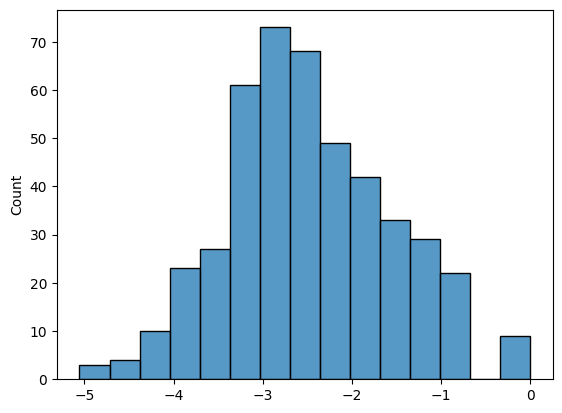

In [25]:
sns.histplot(diff.values[23,:])

<AxesSubplot: ylabel='Count'>

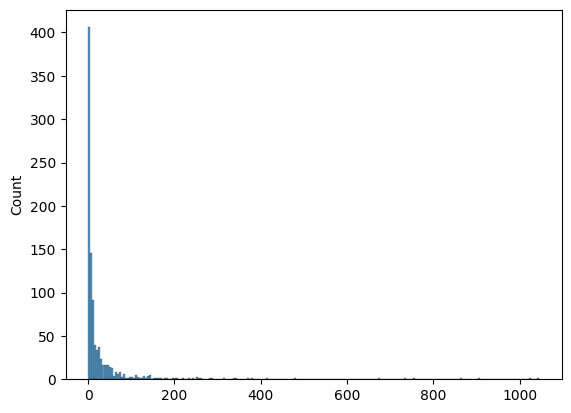

In [125]:
sns.histplot(coors.values[23,:])

<AxesSubplot: ylabel='Count'>

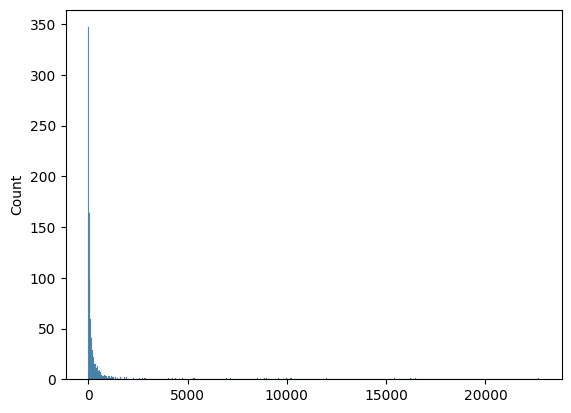

In [123]:
sns.histplot(coors.values[0,:])

<AxesSubplot: ylabel='Count'>

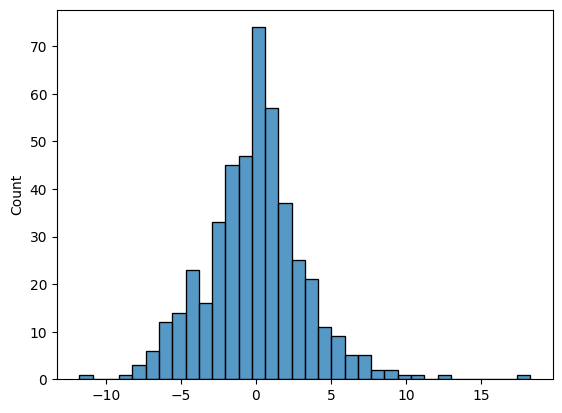

In [102]:
sns.histplot(diff[0,:])